# Task # 3 - To Explore Unsupervised Machine Learning

## Introduction
K-means is a type of unsupervised learning and one of the popular methods of clustering unlabelled data into k clusters. One of the trickier tasks in clustering is identifying the appropriate number of clusters k. In this task, we will provide an overview of how k-means works and discuss how to implement your own clusters.
We will also understand how to use the elbow method as a way to estimate the value k. Another popular method of estimating k is through silhouette analysis, a scikit learn example can be found here http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

## K-means Overview
Before diving into the dataset, let us briefly discuss how k-means works:
The process begins with k centroids initialised at random.
These centroids are used to assign points to its nearest cluster.
The mean of all points within the cluster is then used to update the position of the centroids.
The above steps are repeated until the values of the centroids stabilise.

## Dataset
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.
Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx6
6b10YiwK-/view?usp=sharing

In [1]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Read in data and inspect the first 5 records.

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Below is a split of categorical and continuous features

In [3]:
categorical_features = ['Species']
continuous_features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

### Descriptive statistics below shows the standard measurements of Petal and Sepal of the Iris flower

In [4]:
data[continuous_features].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### To use the categorical features, we need to convert the categorical features to binary using pandas get dummies.

In [5]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


### To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features . Other alternatives includes StandardScaler.

In [6]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

### For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [7]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

### As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.
### Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

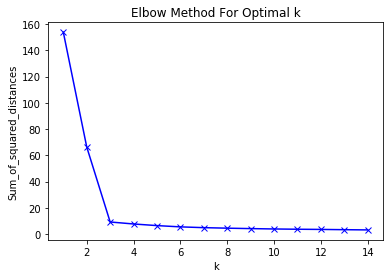

In [8]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3.

In [9]:
x = data.iloc[:, [0, 1, 2, 3]].values

# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

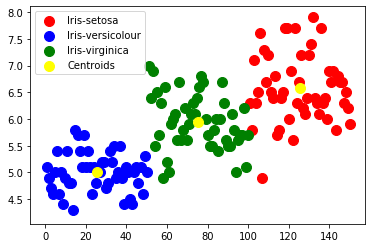

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()